# Simple MNIST convnet

**Author:** [fchollet](https://twitter.com/fchollet)<br>
**Date created:** 2015/06/19<br>
**Last modified:** 2020/04/21<br>
**Description:** A simple convnet that achieves ~99% test accuracy on MNIST.

## Setup

In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

## Prepare the data

In [3]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11501568/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Build the model

In [13]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), strides = (1, 1), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dropout_2 (Dropout)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
__________________________________________________

In [18]:
weights = model.layers[4].get_weights()[0]
np.savetxt('output_weight.txt', weights, delimiter = ',')
weights.shape

(5408, 10)

In [16]:
bias = model.layers[4].get_weights()[1]
np.savetxt('output_bias.txt', bias, delimiter = ',')
len(bias)

10

## Train the model

In [19]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 13s 8ms/step - loss: 0.4242 - accuracy: 0.8825 - val_loss: 0.1566 - val_accuracy: 0.9575
Epoch 2/15
422/422 [==============================] - 3s 8ms/step - loss: 0.1753 - accuracy: 0.9494 - val_loss: 0.1009 - val_accuracy: 0.9728
Epoch 3/15
422/422 [==============================] - 3s 8ms/step - loss: 0.1320 - accuracy: 0.9615 - val_loss: 0.0787 - val_accuracy: 0.9795
Epoch 4/15
422/422 [==============================] - 3s 8ms/step - loss: 0.1104 - accuracy: 0.9678 - val_loss: 0.0711 - val_accuracy: 0.9818
Epoch 5/15
422/422 [==============================] - 3s 8ms/step - loss: 0.0978 - accuracy: 0.9701 - val_loss: 0.0634 - val_accuracy: 0.9828
Epoch 6/15
422/422 [==============================] - 3s 8ms/step - loss: 0.0916 - accuracy: 0.9719 - val_loss: 0.0613 - val_accuracy: 0.9837
Epoch 7/15
422/422 [==============================] - 3s 8ms/step - loss: 0.0844 - accuracy: 0.9738 - val_loss: 0.0569 - val_accuracy: 0.9845
Epoch

## Evaluate the trained model

In [21]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.05331087484955788
Test accuracy: 0.983299970626831


In [40]:
index = 21
out = model.predict(x_test[index:index + 1])
np.argmax(out)


6

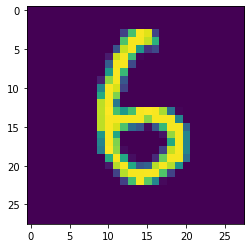

In [41]:
import matplotlib.pyplot as plt
plt.imshow(x_test[index][:,:,0])

In [46]:
import time
start = time.time()
for _ in range(100): 
  out = model.predict(x_test[index:index + 1])
end = time.time()
print((end - start)/100)


0.052080268859863284
